# Exploring SymPy functions numerical evaluation and plotting
## Comparing numpy's normal distribution with analytically defined PDF function

*note: somewhy kernel needs to be restarted after plot is rendered for sympy to work*

In [1]:
from IPython.display import display

from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')

from __future__ import division
import sympy as sym
from sympy import *
x, y, z = symbols("x y z") 
k, m, n = symbols("k m n", integer=True)
f, g, h = map(Function, 'fgh')

In [2]:
import numpy as np

In [3]:
sigma = Symbol('sigma')
mu = Symbol('mu')

gauss = (1/sqrt(2*sigma**2*pi))*exp(-(x - mu)**2/(2*sigma**2))
gauss

             2 
    -(-μ + x)  
    ───────────
           2   
        2⋅σ    
√2⋅ℯ           
───────────────
          ____ 
         ╱  2  
  2⋅√π⋅╲╱  σ   

In [5]:
fnorm = lambdify(x, gauss.subs({sigma:1, mu:0}), modules=['numpy'])
#x_vec = np.arange(0, 10, 0.1)
#y_vex = fn(x_vec)

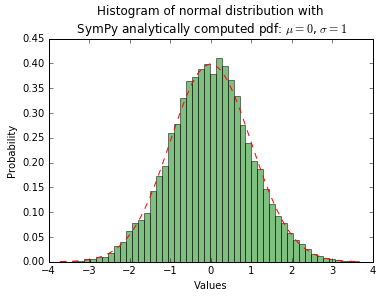

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt


mu = 0  # mean of distribution
sigma = 1  # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

num_bins = 50

# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)

# add a 'best fit' line
y = fnorm(bins)
plt.plot(bins, y, 'r--')

plt.xlabel('Values')
plt.ylabel('Probability')
plt.title('Histogram of normal distribution with\n SymPy analytically computed pdf: $\mu={}$, $\sigma={}$'.format(mu, sigma))
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)

plt.show()